In [2]:
import numpy as np
import pandas as p
import matplotlib.pyplot as plt
import scanpy as sc
import sklearn
import csv
import os
import phenograph
import scipy
import seaborn as sns
import palantir
import cellrank as cr

from collections import Counter

In [3]:
plt.rcParams['font.family']='serif'
plt.rcParams['font.serif']=['DejaVu Sans']

In [4]:
palantir_obj = sc.read('/Users/andreaterceros/Desktop/adatas/palantir_objTH.h5ad')

In [ ]:
sc.external.tl.palantir(palantir_obj, n_components=20, knn=30)

In [ ]:
# Run diffusion maps
pca_projections = p.DataFrame(palantir_obj.obsm['X_pca'], index=palantir_obj.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)

In [ ]:
ms_data = palantir.utils.determine_multiscale_space(dm_res)

In [ ]:
tsne = palantir.utils.run_tsne(ms_data)

In [ ]:
#%matplotlib inline
fig, ax = palantir.plot.plot_tsne(tsne)

In [ ]:
palantir.plot.plot_diffusion_components(tsne, dm_res)

In [5]:
#choose stat cell
start_cell = '231281549327068-0'

In [ ]:
pr_res = palantir.core.run_palantir(ms_data, start_cell,num_waypoints=500)

In [ ]:
palantir.plot.plot_palantir_results(pr_res, tsne)

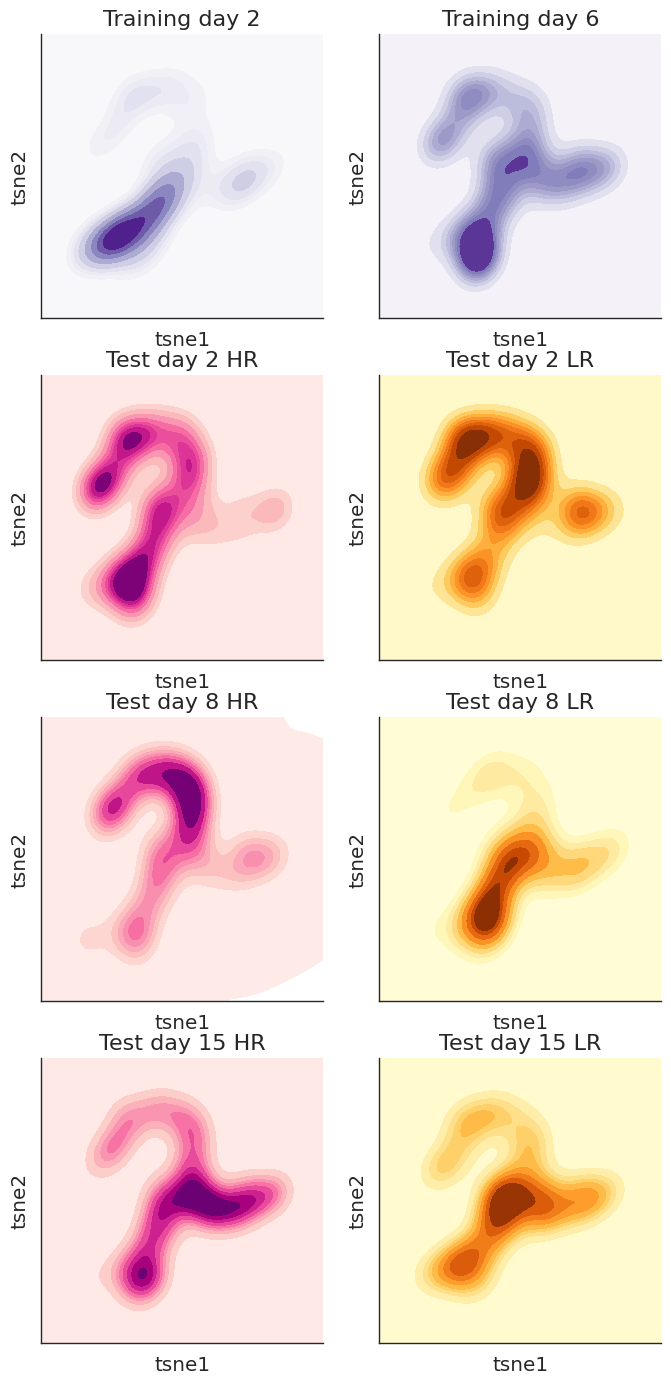

In [14]:
#check density per time point
df_tempi = p.DataFrame({'tsne_1': palantir_obj.obsm['X_tsne'][:,0],
                        'tsne_2': palantir_obj.obsm['X_tsne'][:,1],
                        'batch_id': palantir_obj.obs['batch_id']}, index = palantir_obj.obs.index)

fig = plt.figure(figsize = (4*2, 17))
ax = fig.add_subplot(4,2,1)
sns.kdeplot(data=df_tempi[df_tempi['batch_id'] == '0'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="Purples", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Training day 2', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(4,2,2)
sns.kdeplot(data=df_tempi[df_tempi['batch_id'] == '1'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="Purples", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Training day 6', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(4,2,3)
sns.kdeplot(data=df_tempi[df_tempi['batch_id'] == '2'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Test day 2 HR', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(4,2,4)
sns.kdeplot(data=df_tempi[df_tempi['batch_id'] == '3'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Test day 2 LR', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(4,2,5)
sns.kdeplot(data=df_tempi[df_tempi['batch_id'] == '4'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Test day 8 HR', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(4,2,6)
sns.kdeplot(data=df_tempi[df_tempi['batch_id'] == '5'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Test day 8 LR', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(4,2,7)
sns.kdeplot(data=df_tempi[df_tempi['batch_id'] == '6'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Test day 15 HR', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax = fig.add_subplot(4,2,8)
sns.kdeplot(data=df_tempi[df_tempi['batch_id'] == '7'], x="tsne_1", y="tsne_2",
   fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Test day 15 LR', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax = fig.add_subplot(4,2,8)
#sns.kdeplot(data=df_tempi[df_tempi['batch_id'] == '8'], x="tsne_1", y="tsne_2",
 #   fill=True, thresh=0, levels=10, cmap="Oranges", ax = ax)
#ax.scatter(tsne['x'],tsne['y'], s = 0)
#ax.set_xticks([]);
#ax.set_yticks([]);
#ax.set_title('Home caged', fontsize = 16)
#ax.set_xlabel('tsne1')
#ax.set_ylabel('tsne2')
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

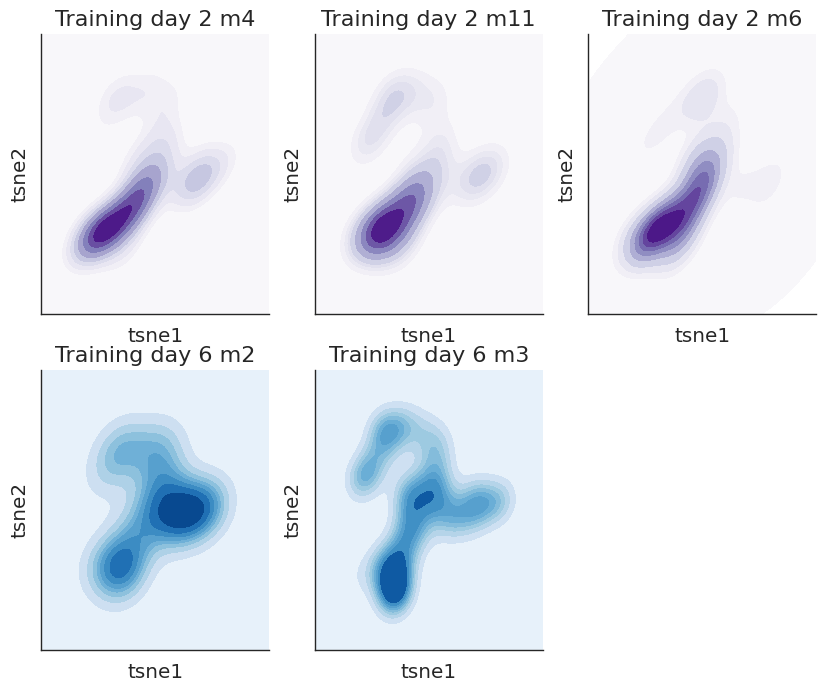

In [15]:
#densities per animal, using cell plex info
df_tempm = p.DataFrame({'tsne_1': palantir_obj.obsm['X_tsne'][:,0],
                        'tsne_2': palantir_obj.obsm['X_tsne'][:,1],
                        'mouse_id': palantir_obj.obs['mouse']}, index = palantir_obj.obs.index)


fig = plt.figure(figsize = (5*2, 8))
ax = fig.add_subplot(2,3,1)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '4'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="Purples", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Training day 2 m4', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(2,3,2)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '11'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="Purples", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Training day 2 m11', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(2,3,3)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '6'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="Purples", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Training day 2 m6', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(2,3,4)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '2'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="Blues", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Training day 6 m2', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(2,3,5)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '3'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="Blues", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Training day 6 m3', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


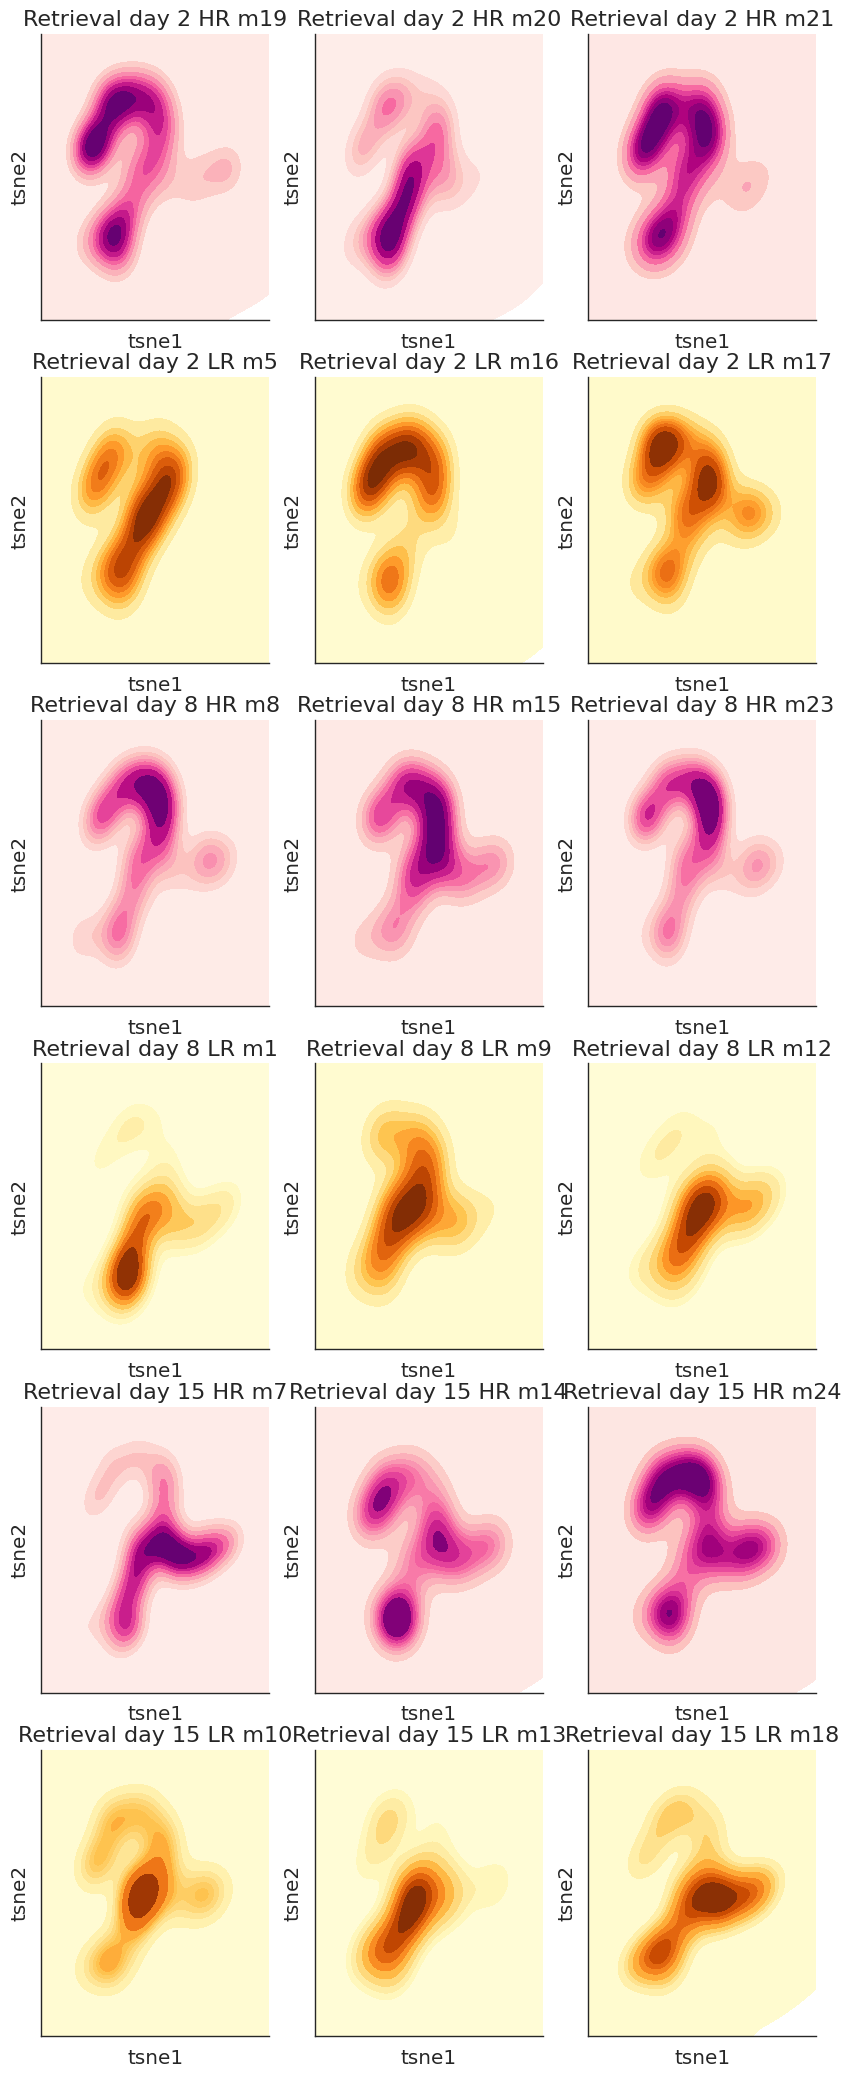

In [16]:
fig = plt.figure(figsize = (5*2, 26))

ax = fig.add_subplot(6,3,1)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '19'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 2 HR m19', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,2)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '20'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 2 HR m20', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,3)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '21'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 2 HR m21', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,4)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '5'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 2 LR m5', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,5)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '16'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 2 LR m16', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,6)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '17'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 2 LR m17', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



ax = fig.add_subplot(6,3,7)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '8'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 8 HR m8', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,8)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '15'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 8 HR m15', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,9)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '23'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 8 HR m23', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



ax = fig.add_subplot(6,3,10)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '1'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 8 LR m1', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax = fig.add_subplot(6,3,11)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '9'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 8 LR m9', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,12)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '12'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 8 LR m12', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax = fig.add_subplot(6,3,13)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '7'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 15 HR m7', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,14)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '14'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 15 HR m14', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,15)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '24'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="RdPu", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 15 HR m24', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax = fig.add_subplot(6,3,16)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '10'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 15 LR m10', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,17)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '13'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 15 LR m13', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = fig.add_subplot(6,3,18)
sns.kdeplot(data=df_tempm[df_tempm['mouse_id'] == '18'], x="tsne_1", y="tsne_2",
    fill=True, thresh=0, levels=10, cmap="YlOrBr", ax = ax)
ax.scatter(tsne[0],tsne[1], s = 0)
ax.set_xticks([]);
ax.set_yticks([]);
ax.set_title('Retrieval day 15 LR m18', fontsize = 16)
ax.set_xlabel('tsne1')
ax.set_ylabel('tsne2')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

/opt/anaconda3/envs/sc2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/anaconda3/envs/sc2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


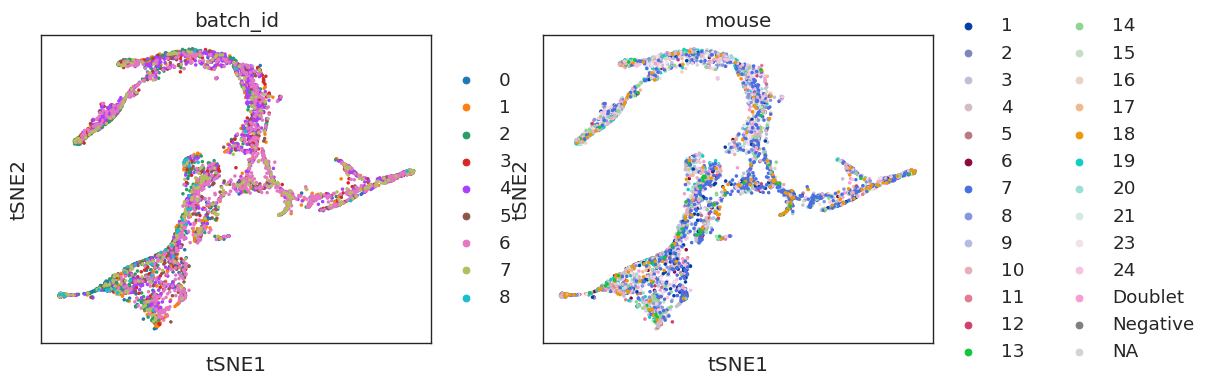

In [18]:
with plt.rc_context({'figure.figsize': (5,4)}): 
    sc.pl.tsne(palantir_obj,color = ['batch_id','mouse'])

In [19]:
#densities per batch
sc.tl.embedding_density(palantir_obj, basis='tsne', groupby='batch_id')

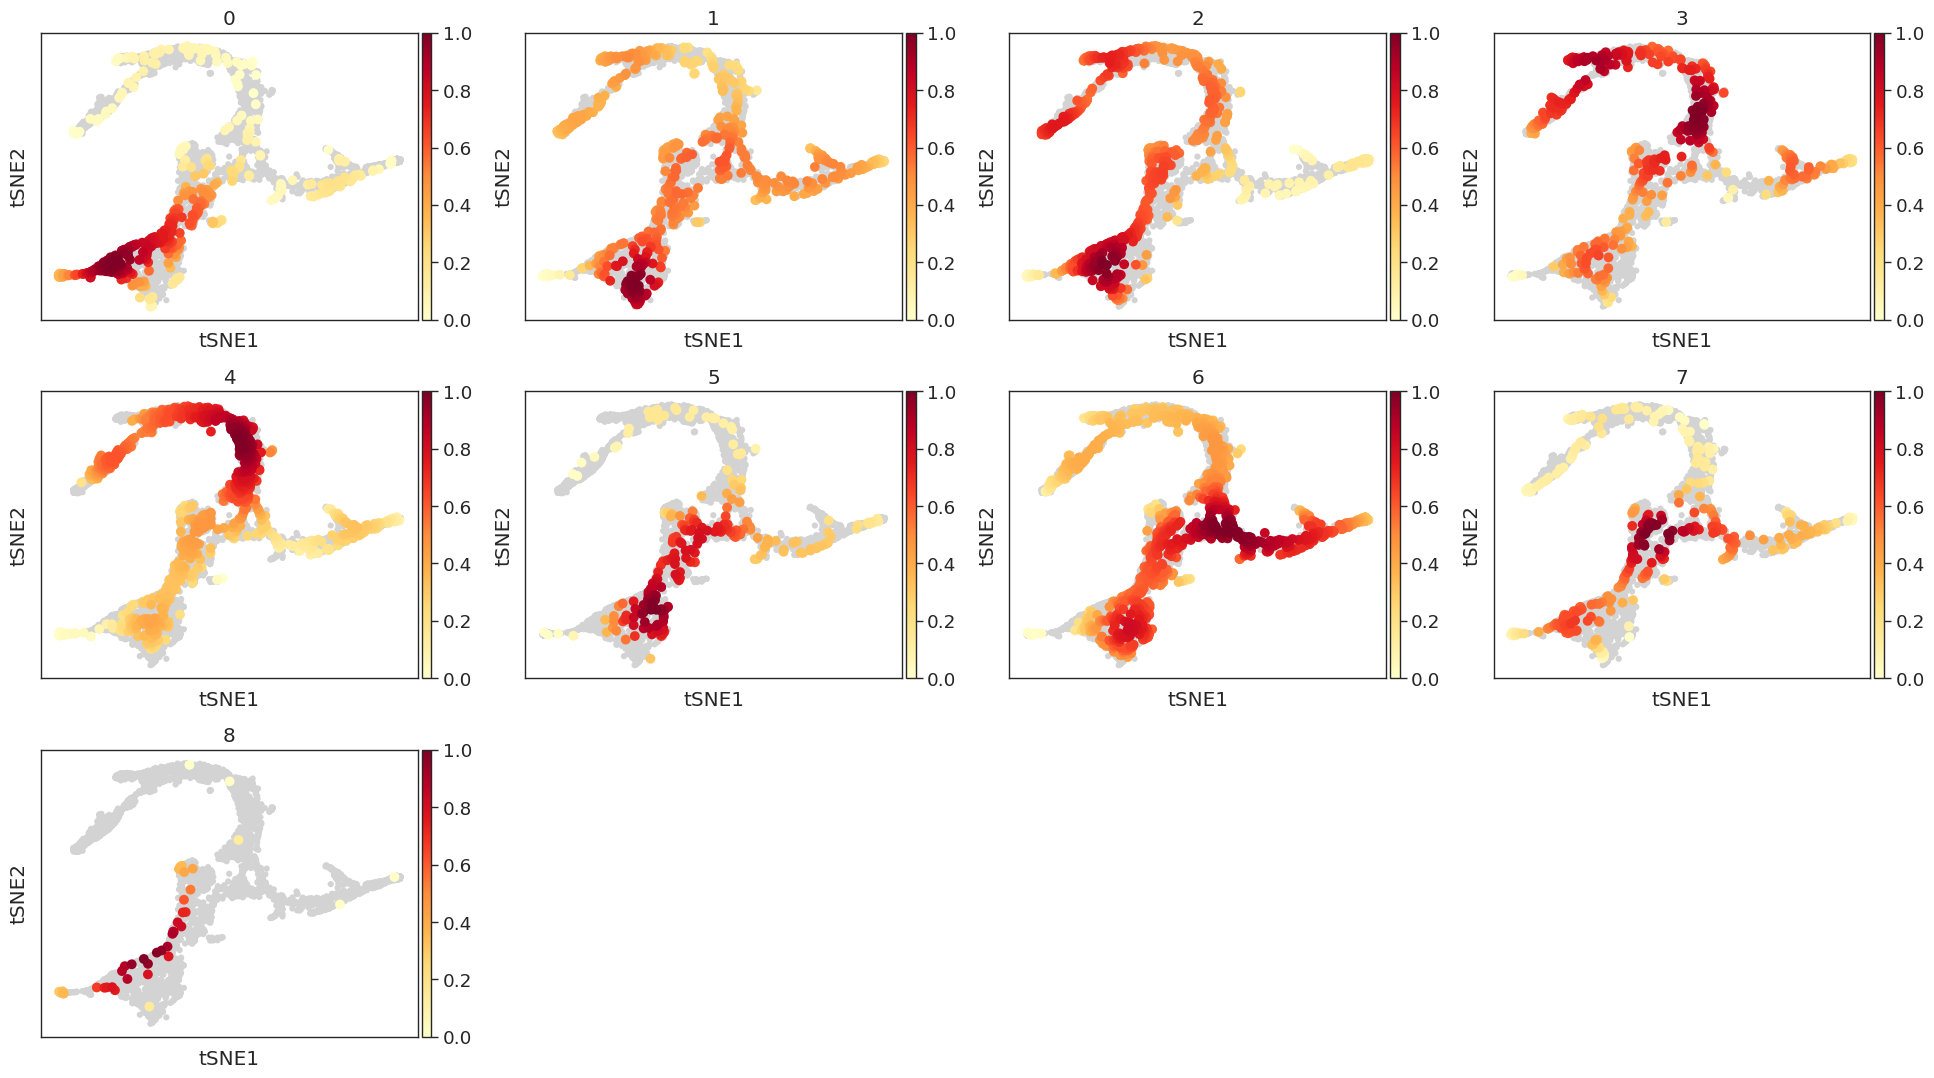

In [20]:
with plt.rc_context({'figure.figsize': (5,4)}): 
    sc.pl.embedding_density(palantir_obj, basis='tsne',key = 'tsne_density_batch_id',bg_dotsize = 80,fg_dotsize = 200,vmin=0,show=False)

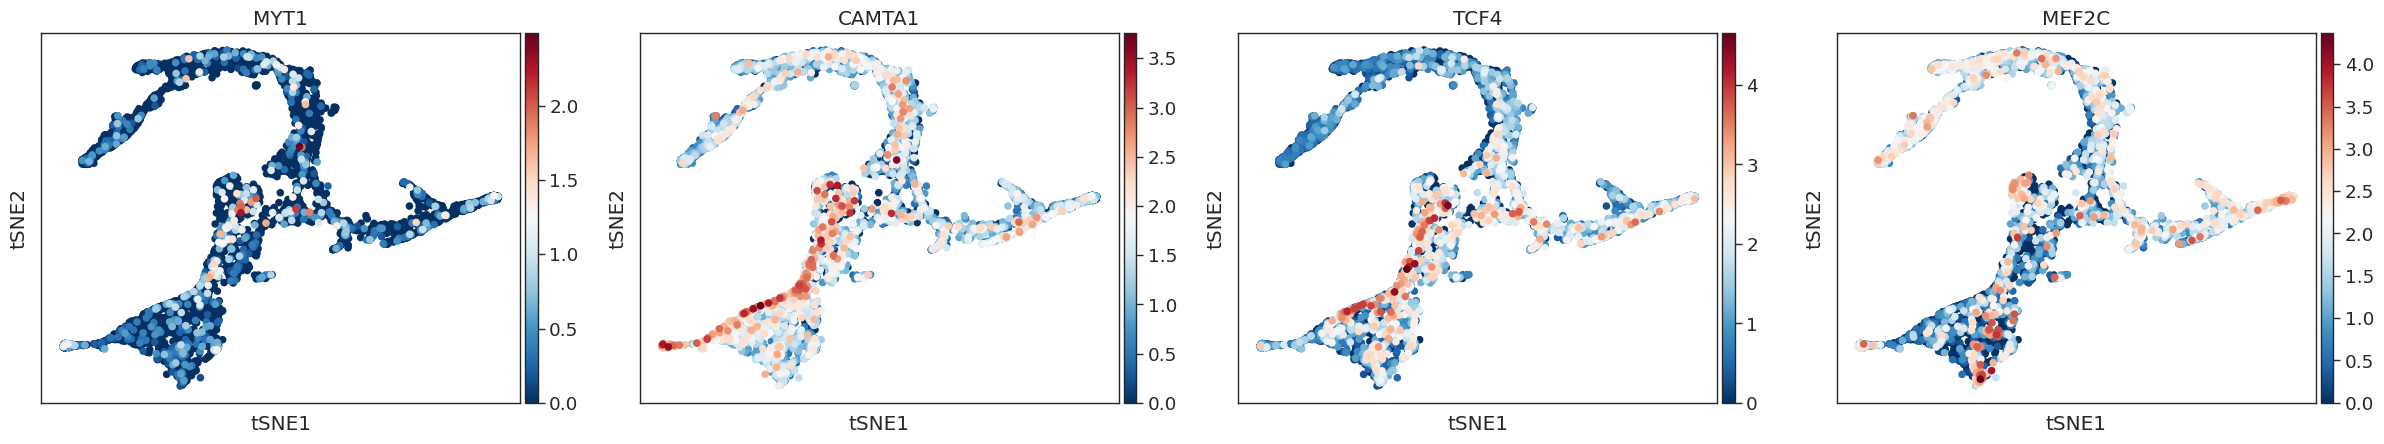

In [23]:
#expression TFs
sc.pl.embedding(palantir_obj, basis='tsne',cmap = 'RdBu_r',
               color=['MYT1','CAMTA1','TCF4','MEF2C'],size=120)

In [25]:
#modules
crebmod = ['PENK', 'NPTX2', 'FOS', 'SORCS3', 'ATF3', 'GPNMB', 'INHBA',
           'CDKN1A', 'NPAS4', 'SCG2', 'ARC', 'BDNF','MAPK4', 'STAT3']
mefmod = ['RORA','PRKACB','IGFBP5','PRNP','CADM1','NR2F2','GNAS','TIMP2','CAMK2D','GNG2','TCF7L2']
cammod = ['SNAP25', 'NFIX', 'CELF2', 'CPLX2', 'CPLX1', 'RTN4', 'NRGN', 'TCEAL6', 'TCEAL5', 'CCND2', 'SV2B', 'CHN1', 'PHACTR1', 'SLC17A7', 'DNM1L', 'SOX4', 'EGR1', 'BCL11B', 'SYT1', 'TPM1', 'ATP2B1', 'DYNLL1', 'YWHAZ', 'MEIS2', 'DCLK1', 'FOXP1', 'CNKSR2', 'ZEB2', 'NFIB']
tcfmod=['SPARC','ZBTB20','ACTB','RGS2','CCND2','B2M','GLUL','PRKCB','APOE','PRNP','EGR1','CADM1','ITM2C','PPP3CA','MARCKS']
mytmod = ['RAB3C', 'RTN3', 'NRSN2', 'GABRB1', 'TMEM59L', 'RASGRF1', 'FAIM2', 'RORA', 'SLC6A1', 
     'UNC80', 'RIMS3', 'SV2A','IDS', 'SLC17A6', 'PRKACB', 'GPRASP2', 'LONRF2', 'ATP9A', 
     'SCN1A', 'PRNP', 'GABRA1', 'TCF7L2', 'CADM1', 'LSAMP', 'UNC5D', 'SYN2', 'TMEM130', 
     'NAP1L5', 'CIT', 'DISP2', 'MIR124-2HG', 'TTC3', 'SCN2A', 'SCG2']

sc.tl.score_genes(palantir_obj, cammod,score_name = 'cammod')
sc.tl.score_genes(palantir_obj, mytmod,score_name = 'mytmod')
sc.tl.score_genes(palantir_obj, crebmod,score_name = 'crebmod')
sc.tl.score_genes(palantir_obj, tcfmod,score_name = 'tcfmod')
sc.tl.score_genes(palantir_obj, mefmod,score_name = 'mefmod')

/opt/anaconda3/envs/sc2/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/opt/anaconda3/envs/sc2/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/opt/anaconda3/envs/sc2/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/opt/anaconda3/envs/sc2/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/opt/anacond

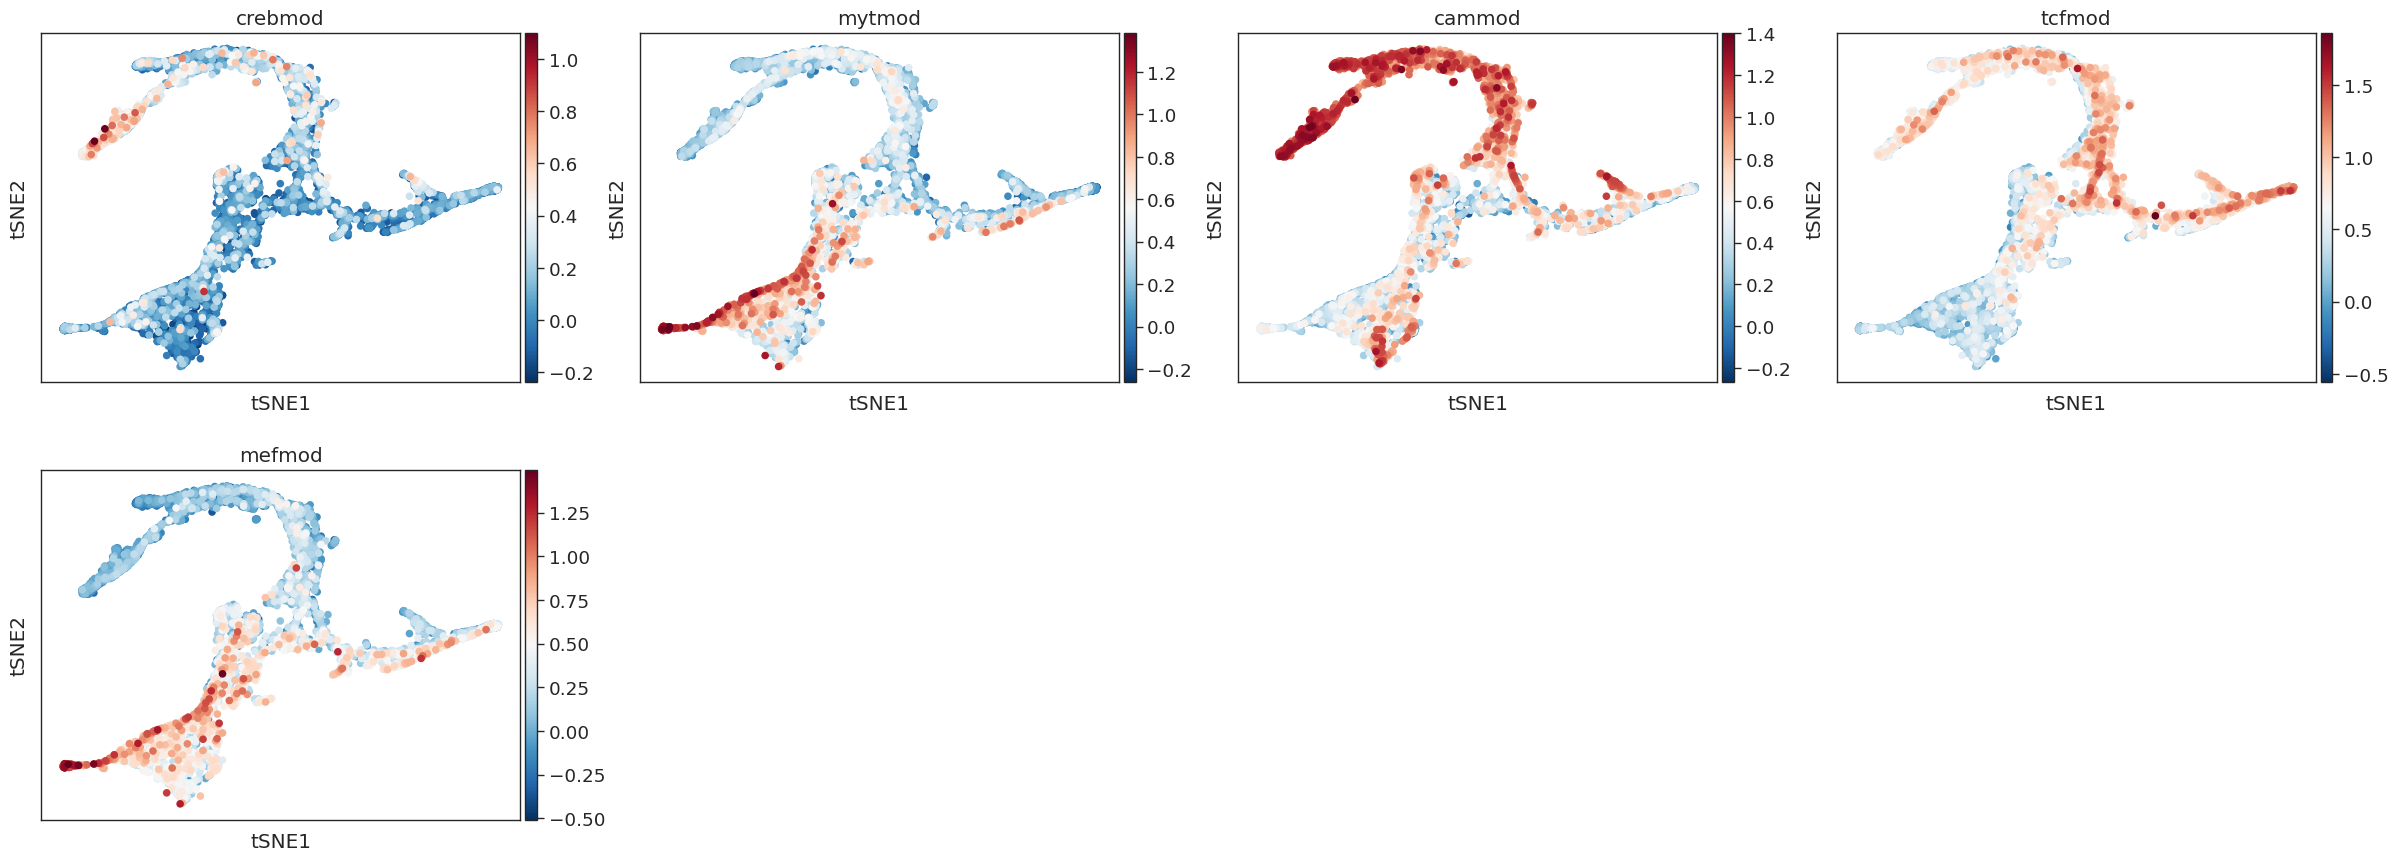

In [27]:
#expression modules
sc.pl.embedding(palantir_obj, basis='tsne',cmap = 'RdBu_r',
               color=['crebmod','mytmod','cammod','tcfmod','mefmod'],size=120)

In [29]:
#expression modules over pseudotime
avg_expcreb =palantir_obj[:, crebmod].X.mean(axis=1)
avg_expcam =palantir_obj[:, cammod].X.mean(axis=1)
avg_exptc =palantir_obj[:, tcfmod].X.mean(axis=1)
avg_expmyt =palantir_obj[:, mytmod].X.mean(axis=1)
avg_expmef =palantir_obj[:, mefmod].X.mean(axis=1)

df = p.DataFrame({'crebmod':avg_expcreb, 'cammod':avg_expcam,
                  'mytmod':avg_expmyt, 'tcfmod':avg_exptc,'mefmod':avg_expmef,
                 },index = palantir_obj.obs['pseudotime'])

(0.0, 1.0)

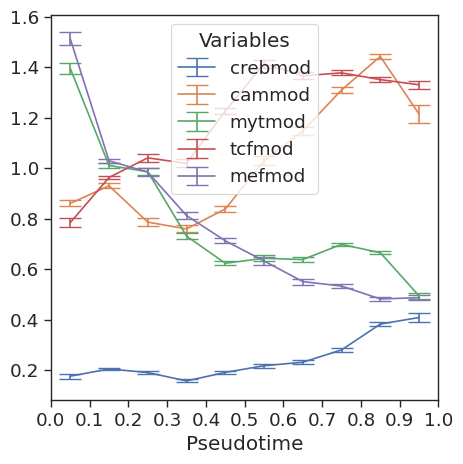

In [30]:
if df.index.name == 'pseudotime':
    df.reset_index(inplace=True)

# Define the number of bins you want to use
num_bins = 10  # You can adjust this value based on how smooth you want the graph to be

# Create bin edges spanning from min to max pseudotime
bin_edges = np.linspace(df['pseudotime'].min(), df['pseudotime'].max(), num_bins + 1)

# Bin the pseudotime data
df['binned'] = p.cut(df['pseudotime'], bins=bin_edges, labels=[(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)])

# Calculate the mean and SEM for each bin for each variable
grouped = df.groupby('binned')
means = grouped.mean()
sems = grouped.sem()

# Plotting
plt.figure(figsize=(5, 5))

# Plot each variable with error bars
for column in df.columns.drop(['pseudotime', 'binned']):  # Exclude non-variable columns
    #plt.plot(means.index, means[column], label=f'{column}', linestyle='-')  # Line plot for each variable

    #shaded sem
    #plt.fill_between(means.index.astype(float), means[column] - sems[column], means[column] + sems[column], alpha=0.3)  # SEM shaded area
    #error bars instead
    plt.errorbar(means.index.astype(float), means[column], yerr=sems[column], label=f'{column}', linestyle='-',
                markersize=8, capsize=8)  # Error bars for SEM

plt.xlabel('Pseudotime')
plt.legend(title='Variables')
plt.xticks(np.linspace(df['pseudotime'].min(), df['pseudotime'].max(), num_bins + 1))  # Adjust x-ticks to align with bins
plt.xlim([df['pseudotime'].min(), df['pseudotime'].max()])

In [31]:
#density of fos+ cells
gene_fos = palantir_obj.var_names.get_loc('FOS')


fos_batch = []

for i in range(0,4664):
    if (palantir_obj.obs['batch_id'][i] == '0') & (palantir_obj.X[i, gene_fos]>0.1):
        fos_batch.append('T2fos')        
    elif (palantir_obj.obs['batch_id'][i] == '1') & (palantir_obj.X[i, gene_fos]>0.1):
        fos_batch.append('T6fos')  
    elif (palantir_obj.obs['batch_id'][i] == '2') & (palantir_obj.X[i, gene_fos]>0.1):
        fos_batch.append('T 2d HRfos')        
    elif (palantir_obj.obs['batch_id'][i] == '3') & (palantir_obj.X[i, gene_fos]>0.1):
        fos_batch.append('T 2d LRfos')  
    elif (palantir_obj.obs['batch_id'][i] == '4') & (palantir_obj.X[i, gene_fos]>0.1):
        fos_batch.append('T 8d HRfos')        
    elif (palantir_obj.obs['batch_id'][i] == '5') & (palantir_obj.X[i, gene_fos]>0.1):
        fos_batch.append('T 8d LRfos')  
    elif (palantir_obj.obs['batch_id'][i] == '6') & (palantir_obj.X[i, gene_fos]>0.1):
        fos_batch.append('T 15d HRfos')        
    elif (palantir_obj.obs['batch_id'][i] == '7') & (palantir_obj.X[i, gene_fos]>0.1):
        fos_batch.append('T 15d LRfos')  
    elif (palantir_obj.obs['batch_id'][i] == '8') & (palantir_obj.X[i, gene_fos]>0.1):
        fos_batch.append('HCfos')  
    else:
        fos_batch.append('na')

In [32]:
palantir_obj.obs['fos_batch'] = fos_batch

In [33]:
sc.tl.embedding_density(palantir_obj, basis='tsne', groupby='fos_batch')

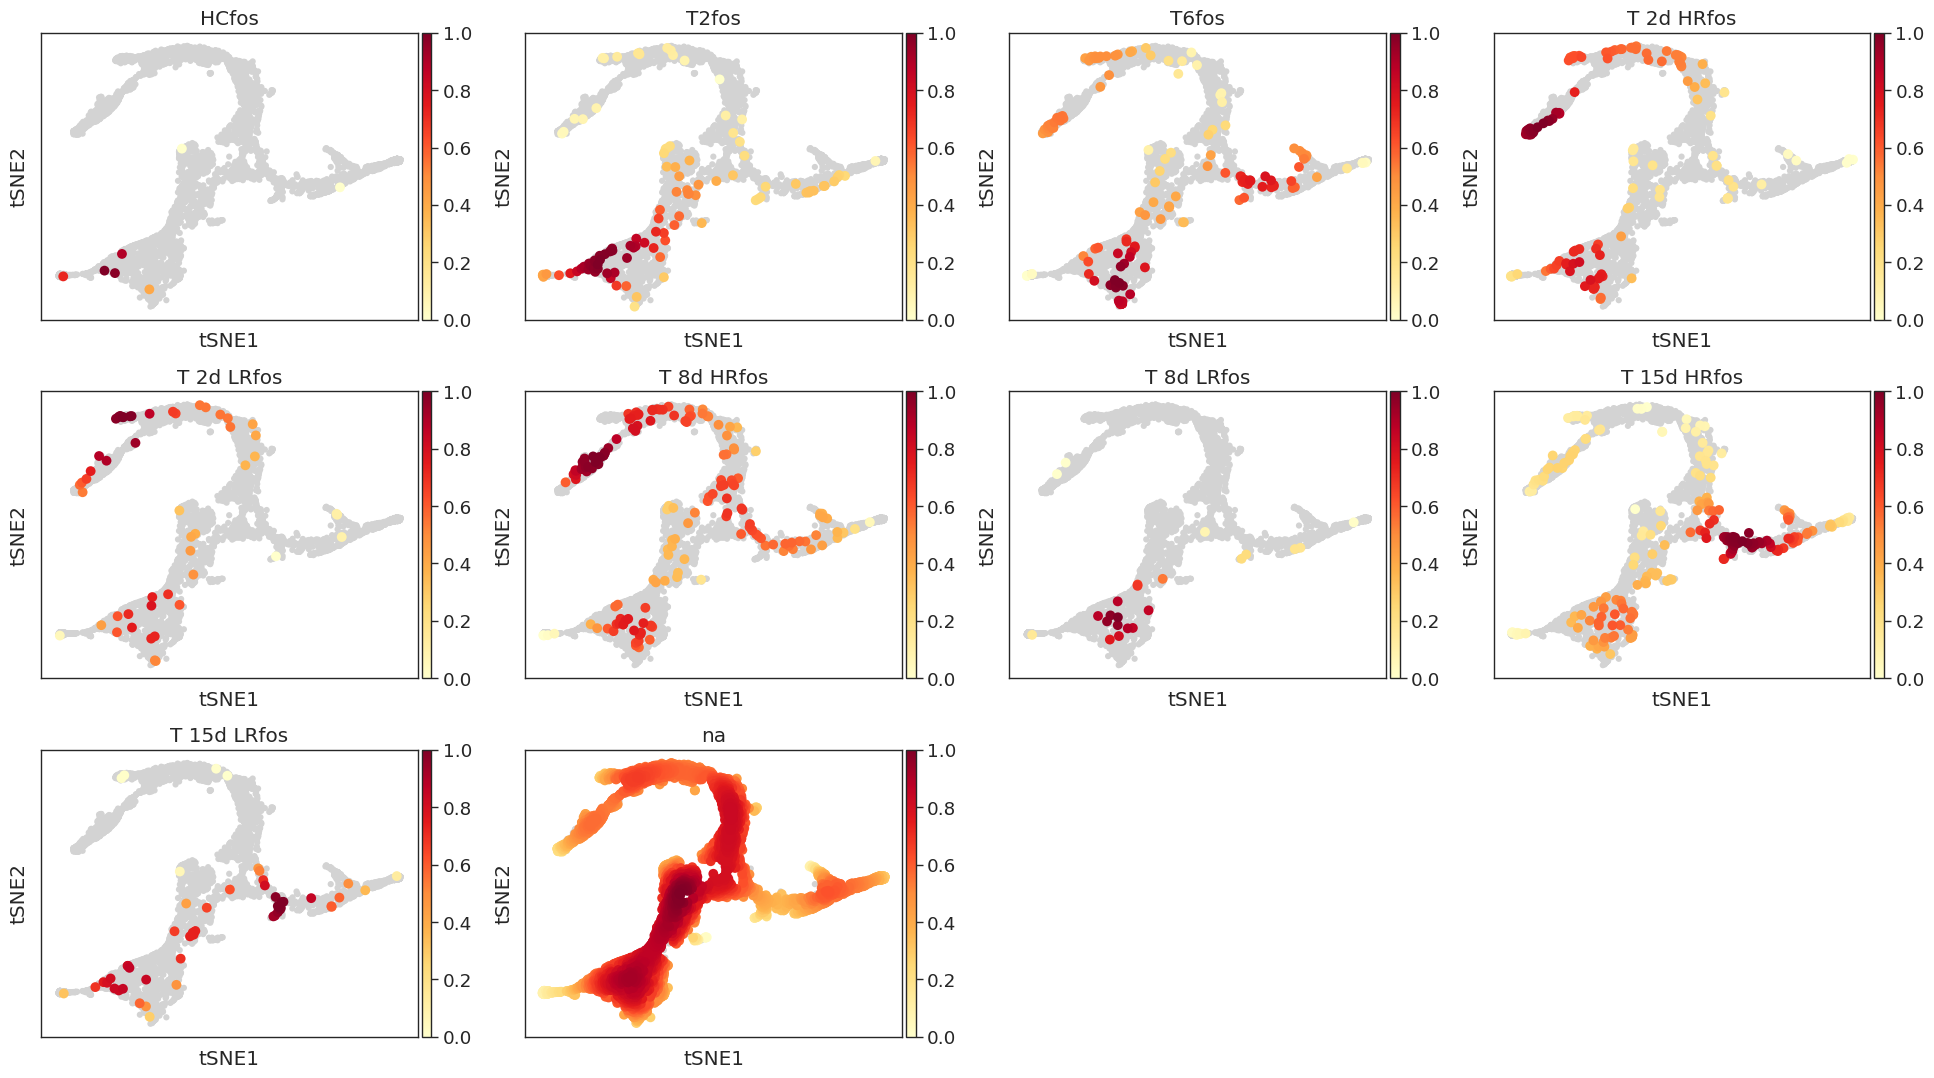

In [34]:
#ignore 'na', those are fos- cells
with plt.rc_context({'figure.figsize': (5,4)}): 
    sc.pl.embedding_density(palantir_obj, basis='tsne',key = 'tsne_density_fos_batch',bg_dotsize = 80,fg_dotsize = 200)

In [ ]:
#further analysis with CellRank package

In [4]:
palantir_obj = sc.read_h5ad('/Users/andrea/Desktop/datasInUse/palantir_objTH.h5ad')

In [5]:
sc.pp.neighbors(palantir_obj,n_neighbors=30,use_rep='X_pca',metric='euclidean',key_added='neighbors')

In [6]:
#palantir transition matrix   use pseudotime saved from palantir before
pk = cr.kernels.PseudotimeKernel(palantir_obj, time_key="pseudotime")
pk.compute_transition_matrix()
print(pk)

100%|█████████████████| 4664/4664 [00:00<00:00, 8128.32cell/s]


PseudotimeKernel[n=4664]


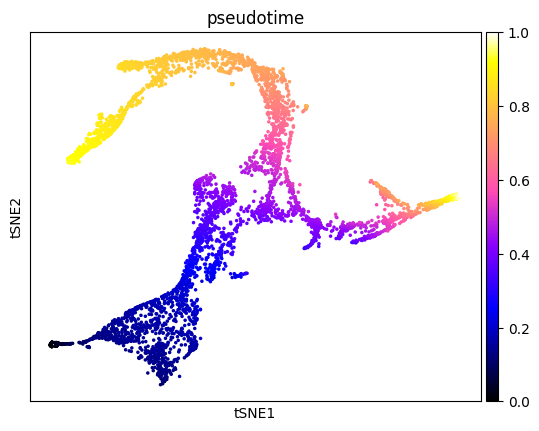

In [9]:
sc.pl.embedding(palantir_obj, basis='tsne',cmap = 'gnuplot2',
               color="pseudotime")

100%|████████████████████████| 15/15 [00:01<00:00, 10.07sim/s]


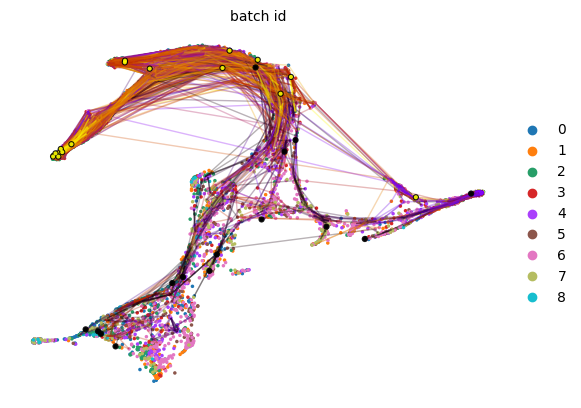

In [10]:
pk.plot_random_walks(
    n_sims=15,
    start_ixs={'batch_id': '0'},
    basis='X_tsne',
    color="batch_id",
    legend_loc="right",
    seed=1)

In [11]:
from cellrank.estimators import GPCCA
g_fwd = cr.estimators.GPCCA(pk)

/Users/andrea/anaconda3/envs/sc_analysis_v2/lib/python3.11/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


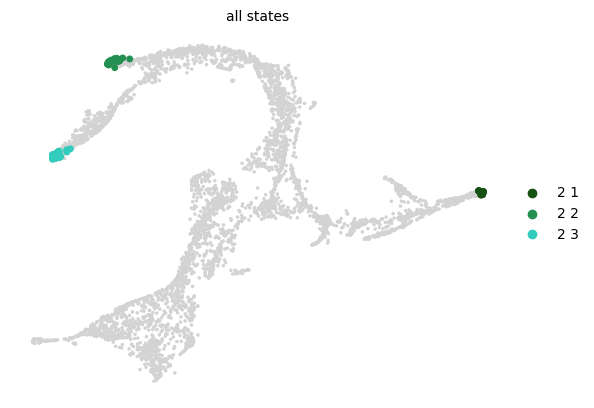

In [13]:
g_fwd.fit(cluster_key="batch_id", n_states=[1, 4])
g_fwd.plot_macrostates(which="all", discrete=True, legend_loc="right", basis="X_tsne",s=100)

In [14]:
g_fwd.predict_initial_states()
g_fwd.predict_terminal_states(allow_overlap=True)

GPCCA[kernel=PseudotimeKernel[n=4664], initial_states=['2_1'], terminal_states=['2_1', '2_2', '2_3']]

/Users/andrea/anaconda3/envs/sc_analysis_v2/lib/python3.11/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/andrea/anaconda3/envs/sc_analysis_v2/lib/python3.11/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


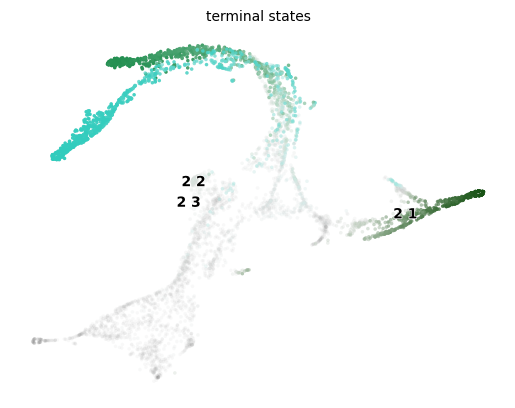

In [15]:
g_fwd.plot_macrostates(which="terminal",basis="X_tsne",discrete=False)

In [18]:
g_fwd.compute_fate_probabilities()

Defaulting to `'gmres'` solver.


100%|█████████████████████████████| 3/3 [00:00<00:00, 28.66/s]


In [21]:
g2 = cr.estimators.GPCCA(pk)

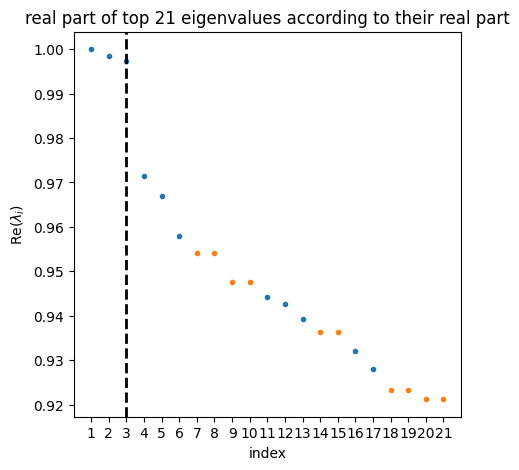

In [22]:
g2.compute_schur()#n_components=20
g2.plot_spectrum(real_only=True)

/Users/andrea/anaconda3/envs/sc_analysis_v2/lib/python3.11/site-packages/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


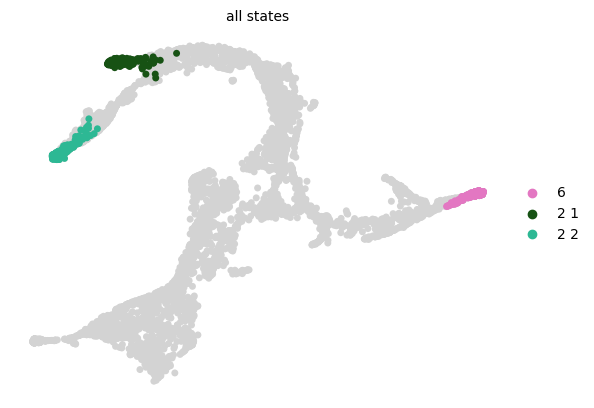

In [23]:
g2.compute_macrostates(n_states=3, cluster_key="batch_id",n_cells=150) 
g2.plot_macrostates(which = 'all', legend_loc="right", size=100, basis="X_tsne")

In [24]:
g2.predict_initial_states(allow_overlap=True)
g2.predict_terminal_states(allow_overlap=True)
g2.compute_fate_probabilities()

100%|█████████████████████████████| 3/3 [00:00<00:00, 12.05/s]


In [28]:
#driver genes lineage 2_2
delta22_df = g2.compute_lineage_drivers(lineages='2_2')

In [29]:
#driver genes lineage 6
delta6_df = g2.compute_lineage_drivers(lineages='6')

In [30]:
#all mouse TFs 
tfactors = open('/Users/andrea/Desktop/cp/TFs_AnimalTFDB.txt', 'r')
tfactor = tfactors.read().split('\n')

In [31]:
#Filter a DataFrame to only include rows for genes specified in the gene_list, maintaining the original order of the DataFrame.
def filter_genes_by_list(df, gene_list):
    # Convert gene_list string to a set for faster lookup
    gene_set = set(gene_list)

    filtered_df = df.loc[df.index.intersection(gene_set)]
    
    return filtered_df

In [ ]:
#can filter ranked driver genes by TF
driver_modified=filter_genes_by_list(delta22_df,tfactor)

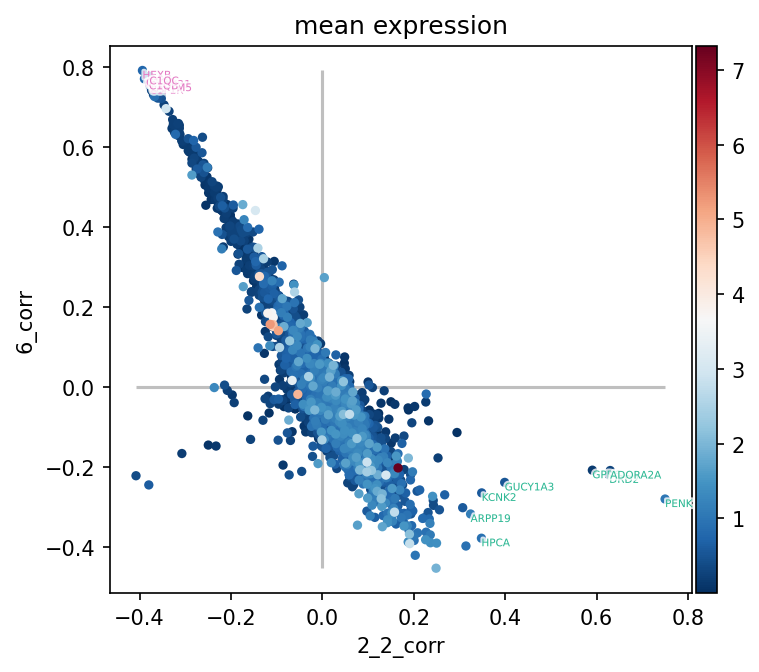

In [36]:
# define set of genes to annotate
driver_df = g2.compute_lineage_drivers(['2_2', '6'], use_raw=False)
genes_oi = {
    "2_2": delta22_df.index[0:8],
    "6": delta6_df.index[0:8],
}

# make sure all of these exist in AnnData
assert [
    gene in palantir_obj.var_names for genes in genes_oi.values() for gene in genes
], "Did not find all genes"

# compute mean gene expression across all cells
palantir_obj.var["mean expression"] = palantir_obj.layers['palantir_imp'].mean(axis=0)    #X.mean(axis=0)


# visualize in a scatter plot
scat = g2.plot_lineage_drivers_correlation(
    lineage_x="2_2",
    lineage_y="6",
    adjust_text=False,
    gene_sets=genes_oi,
    color="mean expression",
    cmap= 'RdBu_r',
    legend_loc="none",
    figsize=(5, 5),
    dpi=150,
    fontsize=5,
    size=80,)

In [41]:
#custom correlation plot takes driver genes, and TFs with their predicted target genes
def compare_and_plot(df1, df2, list_a, list_b, list_c, list_d,list_e):
    common_genes = df1.index.intersection(df2.index)
    
    # Extract the 'corr_score' column for the common genes
    df1_corr = df1.loc[common_genes, 'corr_score']
    df2_corr = df2.loc[common_genes, 'corr_score']
    
    # Align both series to handle any potential mismatches and drop NaNs
    df1_corr, df2_corr = df1_corr.align(df2_corr, join='inner', axis=0)
    
    # Create a new dataframe with the results
    result_df = p.DataFrame({
        'Gene': df1_corr.index,
        'df1_corr': df1_corr.values,
        'df2_corr': df2_corr.values
    })
    
    # Plotting the scatter plot
    plt.figure(figsize=(10, 8))
    
    # Plot all genes as grey dots
    plt.scatter(result_df['df2_corr'], result_df['df1_corr'], color='grey', alpha=0.2,s=25, label='All Genes')
    
    # Define colors for each list
    colors = ['lightcoral', 'darkred', 'greenyellow', 'grey', 'grey']
    lists = [list_a, list_b, list_c, list_d, list_e]
    
    # Highlight genes in the given lists
    for genes_list, color in zip(lists, colors):
        if genes_list:  # If the list is not empty
            highlighted_genes = result_df[result_df['Gene'].isin(genes_list)]
            plt.scatter(
                highlighted_genes['df2_corr'],
                highlighted_genes['df1_corr'],
                color=color,
                s=60,  # Highlighted points slightly larger
                label=f'{color.capitalize()} Highlighted Genes'
            )
            # Add text labels to the highlighted points with adjusted position
            for i in range(highlighted_genes.shape[0]):
                plt.text(
                    highlighted_genes['df2_corr'].iloc[i] + 0.01,  # Shift text to the right
                    highlighted_genes['df1_corr'].iloc[i] + 0.01,  # Shift text upward
                    highlighted_genes['Gene'].iloc[i],
                    fontsize=10,
                    color=color,
                    ha='left'
                )
    
    plt.xlim(right=0.9)  # adjust the right leaving left unchanged
    plt.xlim(left=-0.9)
    #plt.savefig()

In [36]:
pal1= p.read_csv('/Users/andreaterceros/Downloads/earlyConsolidation_pfc.csv')
pal2= p.read_csv('/Users/andreaterceros/Downloads/lateConsolidation_pfc.csv')

In [37]:
pal1.set_index('Gene', inplace=True)
pal2.set_index('Gene', inplace=True)

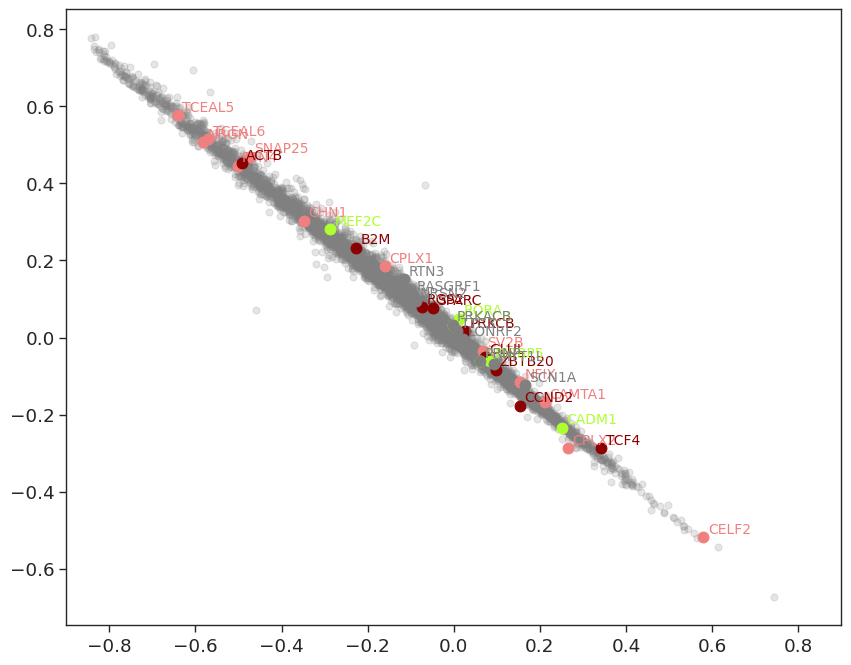

In [42]:
compare_and_plot(pal1, pal2,['CAMTA1','SNAP25', 'NFIX', 'CELF2', 'CPLX2', 'CPLX1', 'RTN4', 'NRGN', 'TCEAL6', 'TCEAL5', 'CND2', 'SV2B', 'CHN1'],
        ['TCF4','SPARC','ZBTB20','ACTB','RGS2','CCND2','B2M','GLUL','PRKCB'],
        ['MEF2C','RORA','PRKACB','IGFBP5','PRNP','CADM1'],
        ['MYT1L','NRSN2','LONRF2','SCN1A','PRNP','TTC3','RASGRF1','PRKACB','RTN3'],[])